In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings;warnings.simplefilter('ignore')
os.listdir('./data')

['#2氧化區.pptx',
 '0E1C0000',
 'PA_201605-2012001更新R7(20200323) - 複製.xlsx',
 'PA_201605-2012001更新R7(20200323).xlsx',
 'tag盤點表20200323.xlsx',
 'train(tag_sheet_check).csv',
 '作業SOP.pptx']

In [10]:
df = pd.read_excel('./data/PA_201605-2012001更新R7(20200323) - 複製.xlsx',
                   index_col=0,
                   parse_dates=True)
df.head()

,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B04,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B08,MLPAP_TI-0706B09,MLPAP_TI-0706B10,MLPAP_TI-0706B11,...,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,MLPAP_PI-0771.PV,MLPAP_TRC-07471.PV
2016-05-09 00:00:00,400,401.957,400.752,402.251,401.149,401,400.05,403,402,401,...,4.05114,4.045683,6.48477,[-11059] No Good Data For Calculation,NaN,-1,1.63519,0.051,-1.38272,133.1
2016-05-09 00:10:00,400,401.943,400.95,402.249,401,401,400.25,403,402,401,...,4.15786,4.152250,6.44989,[-11059] No Good Data For Calculation,NaN,-1,1.62501,0.051,-1.38273,133.1
2016-05-09 00:20:00,400,401.9,400.9,402.101,401,401,400.1,403,402,401,...,4.20812,4.202449,6.4405,[-11059] No Good Data For Calculation,NaN,-0.898558,1.64978,0.051,-1.4,133.1
2016-05-09 00:30:00,400,401.95,400.9,402.3,401,401,400.145,403,402,401,...,4.15232,4.146723,6.46365,[-11059] No Good Data For Calculation,NaN,-0.50901,1.63519,0.051,-1.4,133.2
2016-05-09 00:40:00,400,402,400.85,402.176,401,401,400.405,403,402,401,...,4.01671,4.011298,6.4148,[-11059] No Good Data For Calculation,NaN,-0.992771,1.65426,0.051,-1.3,133.1


In [22]:
tag = pd.read_excel('./data/tag盤點表20200323.xlsx')
print(tag.shape)
tag.head()

(94, 10)


,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
0,1.0,MLPAP_TJC-0627.PV,OX預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,140,160,***
1,2.0,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,160,200,***
2,3.0,MLPAP_FR-0632.PV,汽機風量,流量,KNM3/HR,可控制因子,1分鐘2筆,30,90,****
3,4.0,MLPAP_FQ-0619.PV,OX入料量,流量,kg/HR,可控制因子,1分鐘2筆,2000,8000,****
4,5.0,MLPAP_TIC-0757A.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****


In [19]:
print('only in df:')
set(df.columns)-set(tag['TAG'])

only in df:


{'MLPAP_FI-V211.PV',
 'MLPAP_FR-0755.PV',
 'MLPAP_TI-0716A02',
 'MLPAP_TI-0716A03',
 'MLPAP_TI-0716A04',
 'MLPAP_TI-0716A05',
 'MLPAP_TI-0716A06',
 'MLPAP_TI-0716A07',
 'MLPAP_TI-0716A08',
 'MLPAP_TI-0716A09',
 'MLPAP_TI-0716A10',
 'MLPAP_TI-0716A11',
 'MLPAP_TI-0716A12',
 'MLPAP_TI-0716A13',
 'MLPAP_TI-0716A14',
 'MLPAP_TI-0716A15',
 'MLPAP_TI-0716A16',
 'MLPAP_TI-0716A17',
 'MLPAP_TI-0716A18',
 'MLPAP_TI-0716A19',
 'MLPAP_TI-0716A20',
 'MLPAP_TI-0716A21',
 'MLPAP_TI-0716A22',
 'MLPAP_TI-0716A23',
 'MLPAP_TI-0757B.PV',
 'MLPAP_TRC-07471.PV'}

In [20]:
print('only in tag:')
set(tag['TAG'])-set(df.columns)

only in tag:


{'MLPAP_TJ-0716A02',
 'MLPAP_TJ-0716A03',
 'MLPAP_TJ-0716A04',
 'MLPAP_TJ-0716A05',
 'MLPAP_TJ-0716A06',
 'MLPAP_TJ-0716A07',
 'MLPAP_TJ-0716A08',
 'MLPAP_TJ-0716A09',
 'MLPAP_TJ-0716A10',
 'MLPAP_TJ-0716A11',
 'MLPAP_TJ-0716A12',
 'MLPAP_TJ-0716A13',
 'MLPAP_TJ-0716A14',
 'MLPAP_TJ-0716A15',
 'MLPAP_TJ-0716A16',
 'MLPAP_TJ-0716A17',
 'MLPAP_TJ-0716A18',
 'MLPAP_TJ-0716A19',
 'MLPAP_TJ-0716A20',
 'MLPAP_TJ-0716A21',
 'MLPAP_TJ-0716A22',
 'MLPAP_TJ-0716A23',
 'MLPAP_TRC-0747.PV',
 nan,
 '第二模型使用'}

# replace('TI','TJ')

In [26]:
# replace('TI','TJ')
df.columns = [str(i).replace('TI','TJ') for i in df.columns]
tag.TAG = [str(i).replace('TI','TJ') for i in tag.TAG]

In [27]:
print('only in tag:')
set(tag['TAG'])-set(df.columns)

only in tag:


{'MLPAP_TRC-0747.PV', 'nan', '第二模型使用'}

In [28]:
print('only in df:')
set(df.columns)-set(tag['TAG'])

only in df:


{'MLPAP_FI-V211.PV',
 'MLPAP_FR-0755.PV',
 'MLPAP_TJ-0757B.PV',
 'MLPAP_TRC-07471.PV'}

# drop two column

In [31]:
# drop two column
print(df.shape)
df = df.drop(['MLPAP_FR-0755.PV','MLPAP_FI-V211.PV'],axis=1)
print(df.shape)

(193825, 95)
(193825, 93)


# rename column

In [35]:
df = df.rename(columns={'MLPAP_TRC-07471.PV':'MLPAP_TRC-0747.PV'})

# add 'MLPAP_TJ-0757B.PV'

In [49]:
temp = tag[tag['TAG'] == tag['TAG'][tag['TAG'].str.contains('0757A')].values[0]].copy()
temp['TAG'] = 'MLPAP_TJ-0757B.PV'
tag = tag.append(temp)

In [50]:
tag.tail()

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
91,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,第二模型使用,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,92.0,MLPAP_V125-PHD,粗PA儲槽PHD,組成,%,不可控制因子,1天1筆,0,0.1,***
4,5.0,MLPAP_TJC-0757B.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****
4,5.0,MLPAP_TJ-0757B.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****


# check tag sheet and df.columns

In [51]:
print('only in df:')
set(df.columns)-set(tag['TAG'])

only in df:


set()

In [52]:
print('only in tag:')
set(tag['TAG'])-set(df.columns)

only in tag:


{'MLPAP_TJC-0757B.PV', 'nan', '第二模型使用'}

In [54]:
df.to_csv('./data/train(tag_sheet_check).csv')
print('done')

done


In [56]:
del df

NameError: name 'df' is not defined

In [58]:
df = pd.read_csv('./data/train(tag_sheet_check).csv',index_col=0)
df.head()

,MLPAP_TJ-0706B02,MLPAP_TJ-0706B03,MLPAP_TJ-0706B04,MLPAP_TJ-0706B05,MLPAP_TJ-0706B06,MLPAP_TJ-0706B07,MLPAP_TJ-0706B08,MLPAP_TJ-0706B09,MLPAP_TJ-0706B10,MLPAP_TJ-0706B11,...,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TJC-0757.PV,MLPAP_V125-PHD,MLPAP_PI-0771.PV,MLPAP_TRC-0747.PV
2016-05-09 00:00:00,400,401.957,400.752,402.251,401.149,401,400.05,403,402,401,...,0,4.75646879756469E-06*1,4.045683,6.48477,NaN,-1,1.63519,0.051,-1.38272,133.1
2016-05-09 00:10:00,400,401.943,400.95,402.249,401,401,400.25,403,402,401,...,0,4.75646879756469E-06*2,4.152250,6.44989,NaN,-1,1.62501,0.051,-1.38273,133.1
2016-05-09 00:20:00,400,401.9,400.9,402.101,401,401,400.1,403,402,401,...,0,4.75646879756469E-06*3,4.202449,6.4405,NaN,-0.898558,1.64978,0.051,-1.4,133.1
2016-05-09 00:30:00,400,401.95,400.9,402.3,401,401,400.145,403,402,401,...,0,4.75646879756469E-06*4,4.146723,6.46365,NaN,-0.50901,1.63519,0.051,-1.4,133.2
2016-05-09 00:40:00,400,402,400.85,402.176,401,401,400.405,403,402,401,...,0,4.75646879756469E-06*5,4.011298,6.4148,NaN,-0.992771,1.65426,0.051,-1.3,133.1


In [64]:
df.dtypes

MLPAP_TJ-0706B02     object
MLPAP_TJ-0706B03     object
MLPAP_TJ-0706B04     object
MLPAP_TJ-0706B05     object
MLPAP_TJ-0706B06     object
                      ...  
MLPAP_PI-0658.PV     object
MLPAP_TJC-0757.PV    object
MLPAP_V125-PHD       object
MLPAP_PI-0771.PV     object
MLPAP_TRC-0747.PV    object
Length: 93, dtype: object

In [68]:
df = df.replace('[-11059] No Good Data For Calculation',np.nan)

In [75]:
df = df.iloc[:-1,:]
print(df.shape)

(193824, 93)


In [77]:
def f(x):
    a,b = str(x).split('*')
    return float(a)*float(b)

df['DATA OF USE'] = [f(i) for i in df['DATA OF USE']]
df[['DATA OF USE']].sample(5)

,DATA OF USE
2017-04-23 04:40:00,0.239179
2019-05-20 05:00:00,0.757682
2016-12-27 11:20:00,0.159232
2019-07-10 21:10:00,0.793075
2018-11-22 08:00:00,0.635165


In [79]:
df = df.replace('Scan Off',np.nan)

In [81]:
df = df.replace('Not Connect',np.nan)

In [83]:
df = df.replace('I/O Timeout',np.nan)

In [85]:
df = df.replace('Bad',np.nan)

In [86]:
df = df.astype('float64')
df.dtypes

MLPAP_TJ-0706B02     float64
MLPAP_TJ-0706B03     float64
MLPAP_TJ-0706B04     float64
MLPAP_TJ-0706B05     float64
MLPAP_TJ-0706B06     float64
                      ...   
MLPAP_PI-0658.PV     float64
MLPAP_TJC-0757.PV    float64
MLPAP_V125-PHD       float64
MLPAP_PI-0771.PV     float64
MLPAP_TRC-0747.PV    float64
Length: 93, dtype: object

In [87]:
def get_col(name):
    return df.columns[df.columns.str.contains(name)].tolist()

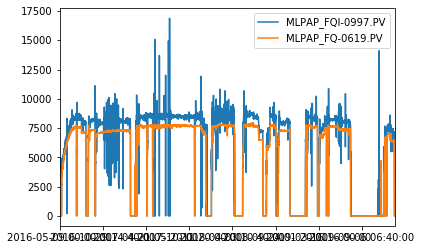

In [88]:
col1 = get_col('0997')
col2 = get_col('0619')
df[col1+col2].plot()

In [89]:
df.to_csv('./data/train(tag_sheet_check).csv')
print('done')

done


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tag = pd.read_excel('./data/tag盤點表20200323.xlsx')
print(tag.shape)
tag.head()

(94, 10)


,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
0,1.0,MLPAP_TJC-0627.PV,OX預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,140,160,***
1,2.0,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,160,200,***
2,3.0,MLPAP_FR-0632.PV,汽機風量,流量,KNM3/HR,可控制因子,1分鐘2筆,30,90,****
3,4.0,MLPAP_FQ-0619.PV,OX入料量,流量,kg/HR,可控制因子,1分鐘2筆,2000,8000,****
4,5.0,MLPAP_TIC-0757A.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****


In [3]:
tag[tag['category']=='可控制因子']

,item,TAG,chinese,character,unit,category,period,min,max,推測顯著性(依製程經驗)
0,1.0,MLPAP_TJC-0627.PV,OX預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,140,160,***
1,2.0,MLPAP_TRC-0610.PV,空氣預熱器出口溫度,溫度,℃,可控制因子,1分鐘2筆,160,200,***
2,3.0,MLPAP_FR-0632.PV,汽機風量,流量,KNM3/HR,可控制因子,1分鐘2筆,30,90,****
3,4.0,MLPAP_FQ-0619.PV,OX入料量,流量,kg/HR,可控制因子,1分鐘2筆,2000,8000,****
4,5.0,MLPAP_TIC-0757A.PV,反應槽鹽浴溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,****
5,6.0,MLPAP_PIC-0741.PV,汽鼓(V211)鍋爐水壓力,壓力,KG/CM2,可控制因子,1分鐘2筆,0,30.05,*
6,7.0,MLPAP_LIC-0738.PV,汽鼓(V211)鍋爐水液位,液位,%,可控制因子,1分鐘2筆,20,60,*
7,8.0,MLPAP_PIC-0761.PV,鹽浴冷卻器(E112)出口壓力,壓力,BAR,可控制因子,1分鐘2筆,40,55,***
8,9.0,MLPAP_TRC-0762.PV,鹽浴冷卻器(E112)入口溫度,溫度,℃,可控制因子,1分鐘2筆,345,365,***
9,10.0,MLPAP_LRC-0729.PV,鍋爐水液位控制,液位,%,可控制因子,1分鐘2筆,20,60,*


In [39]:
df = pd.read_csv('./data/train(tag_sheet_check).csv',index_col=0,parse_dates=True)
print(df.shape)
df.head()

(193824, 93)


,MLPAP_TJ-0706B02,MLPAP_TJ-0706B03,MLPAP_TJ-0706B04,MLPAP_TJ-0706B05,MLPAP_TJ-0706B06,MLPAP_TJ-0706B07,MLPAP_TJ-0706B08,MLPAP_TJ-0706B09,MLPAP_TJ-0706B10,MLPAP_TJ-0706B11,MLPAP_TJ-0706B12,MLPAP_TJ-0706B13,MLPAP_TJ-0706B14,MLPAP_TJ-0706B15,MLPAP_TJ-0706B16,MLPAP_TJ-0706B17,MLPAP_TJ-0706B18,MLPAP_TJ-0706B19,MLPAP_TJ-0706B20,MLPAP_TJ-0706B21,MLPAP_TJ-0706B22,MLPAP_TJ-0706B23,MLPAP_TJ-0706B24,MLPAP_TJ-0716A02,MLPAP_TJ-0716A03,MLPAP_TJ-0716A04,MLPAP_TJ-0716A05,MLPAP_TJ-0716A06,MLPAP_TJ-0716A07,MLPAP_TJ-0716A08,MLPAP_TJ-0716A09,MLPAP_TJ-0716A10,MLPAP_TJ-0716A11,MLPAP_TJ-0716A12,MLPAP_TJ-0716A13,MLPAP_TJ-0716A14,MLPAP_TJ-0716A15,MLPAP_TJ-0716A16,MLPAP_TJ-0716A17,MLPAP_TJ-0716A18,MLPAP_TJ-0716A19,MLPAP_TJ-0716A20,MLPAP_TJ-0716A21,MLPAP_TJ-0716A22,MLPAP_TJ-0716A23,MLPAP_TJR-0715A1.PV,MLPAP_TJR-0715A2.PV,MLPAP_TJR-0715B1.PV,MLPAP_TJR-0715B2.PV,MLPAP_TJR-0720A1.PV,MLPAP_TJR-0720A2.PV,MLPAP_TJR-0720B1.PV,MLPAP_TJR-0720B2.PV,MLPAP_TJR-0762A1.PV,MLPAP_TJR-0762A2.PV,MLPAP_TJR-0762B1.PV,MLPAP_TJR-0762B2.PV,MLPAP_TJ-0706A02,MLPAP_TJ-0706B01,MLPAP_TJ-0706C01,MLPAP_TJ-0706D01,MLPAP_TJ-0716B01,MLPAP_TJ-0716C01,MLPAP_TJ-0716D01,MLPAP_TJ-0716E01,MLPAP_TJ-0716A01,MLPAP_TJ-0706E01,MLPAP_TJ-0706A01,MLPAP_TJ-0716D02,MLPAP_TJC-0627.PV,MLPAP_TRC-0610.PV,MLPAP_FR-0632.PV,MLPAP_FQ-0619.PV,MLPAP_TJC-0757A.PV,MLPAP_TJ-0757B.PV,MLPAP_PIC-0741.PV,MLPAP_LIC-0738.PV,MLPAP_PIC-0761.PV,MLPAP_TRC-0762.PV,MLPAP_LRC-0729.PV,MLPAP_TJC-1721.PV,MLPAP_TRC-1734.PV,MLPAP_TJR-0721.PV,MLPAP_FQI-0997.PV,DATA OF USE,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_FI-V211.PV(轉換後),MLPAP_PI-0658.PV,MLPAP_TJC-0757.PV,MLPAP_V125-PHD,MLPAP_PI-0771.PV,MLPAP_TRC-0747.PV
2016-05-09 00:00:00,400.0,401.957120,400.751866,402.250788,401.148767,401.0,400.050078,403.0,402.0,401.0,400.785116,401.0,403.000000,400.149840,402.050208,401.949962,401.050078,403.0,400.799635,398.999006,401.050038,401.0,402.0,401.0,400.100219,401.0,400.0,400.0,401.0,400.000000,400.0,400.0,400.149958,400.0,400.0,399.149867,399.000000,401.253627,400.642893,399.899794,400.0,401.0,399.0,401.0,400.355582,402.690635,401.217023,399.684741,0.0,402.431253,42.755030,401.865110,400.962739,402.032356,0.0,0.0,561.207218,400.0,402.349811,400.0,400.0,399.827352,401.372643,400.292996,399.201963,401.0,401.0,400.288292,400.050142,30.945536,200.786180,0.0,0.0,399.700012,400.514472,NaN,5.235951,46.900002,401.209359,0.0,63.684562,182.195587,236.535378,0.0,0.000005,4.045683,6.484770,NaN,-1.000000,1.635186,0.051,-1.38272,133.100006
2016-05-09 00:10:00,400.0,401.942713,400.949883,402.249145,401.000000,401.0,400.249800,403.0,402.0,401.0,400.618640,401.0,403.099751,400.000000,402.000000,401.835011,401.050052,403.0,400.800413,398.950800,401.050052,401.0,402.0,401.0,400.050129,401.0,400.0,400.0,401.0,400.000000,400.0,400.0,400.499784,400.0,400.0,399.150799,399.000000,401.361592,400.600025,399.949871,400.0,401.0,399.0,401.0,400.202447,402.774615,401.089483,399.625166,0.0,402.448542,57.309160,401.954911,400.947219,402.010032,0.0,0.0,561.157052,400.0,402.000000,400.0,400.0,399.850198,401.427966,400.200007,399.350223,401.0,401.0,400.050038,400.099686,30.900000,201.196134,0.0,0.0,399.700012,400.540553,NaN,5.208001,46.900002,401.087208,0.0,61.767096,182.143029,236.933444,0.0,0.000010,4.152250,6.449888,NaN,-1.000000,1.625011,0.051,-1.38273,133.100006
2016-05-09 00:20:00,400.0,401.900145,400.899767,402.101255,401.000000,401.0,400.100155,403.0,402.0,401.0,400.796427,401.0,403.000000,400.050129,402.000000,401.764998,401.000000,403.0,400.749399,399.000000,401.000000,401.0,402.0,401.0,400.149919,401.0,400.0,400.0,401.0,400.000000,400.0,400.0,400.065078,400.0,400.0,399.199546,399.000000,401.899611,400.552217,399.906691,400.0,401.0,399.0,401.0,400.347567,402.728676,401.060560,399.670499,0.0,402.434760,44.022862,401.922669,400.927853,402.014945,0.0,0.0,561.165145,400.0,402.350189,400.0,400.0,399.900366,401.671722,400.456873,399.200618,401.0,401.0,400.000000,400.376929,30.855514,201.631164,0.0,0.0,399.734506,400.594478,NaN,5.246516,46.930040,401.060547,0.0,62.2941

In [5]:
df.columns = [str(i).replace('TI','TJ') for i in df.columns]
tag['TAG'] = [str(i).replace('TI','TJ') for i in tag['TAG'].values]

In [6]:
temp = tag[tag['TAG']=='MLPAP_TJC-0757A.PV'].copy()
temp['TAG'] = 'MLPAP_TJ-0757B.PV'
tag = tag.append(temp)

In [7]:
def get_col(df,name):
    return df.columns[df.columns.str.contains(name)].tolist()

In [8]:
print('only in df:')
set(df.columns)-set(tag['TAG'])

only in df:


set()

In [9]:
print('only in df:')
set(tag['TAG'])-set(df.columns)

only in df:


{'nan', '第二模型使用'}

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

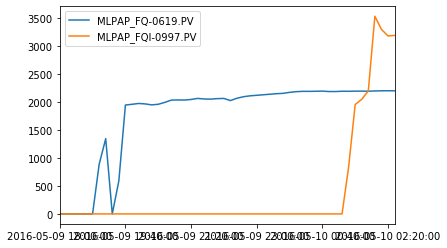

In [29]:
col1 = get_col(df,'0619')
col2 = get_col(df,'0997')
cols = col1+col2
s = '2016-05-09 18:00:00'
e = '2016-05-10 02:30:00'
df.loc[s:e,cols].plot()
plt.show()

In [40]:
col1 = get_col(df,'0619')[0]
t1 = df.loc[df[col1]>0,col1].head(1).index

In [41]:
col2 = get_col(df,'0997')[0]
t2 = df.loc[df[col2]>0,col2].head(1).index

In [42]:
t2-t1

TimedeltaIndex(['06:20:00'], dtype='timedelta64[ns]', freq=None)